In [1]:
%matplotlib widget
from pyGCodeDecode import gcode_interpreter
import matplotlib.pyplot as plt
import numpy as np
# ipympl can be install via pip: "pip install ipympl"
import matplotlib as mpl 
import matplotlib.pyplot as plt

#PRINTER DEFINITION
anisoprint_A4 = {
    #general properties
    "nozzle_diam"   :   0.4,
    "filament_diam" :   1.75,
    
    #default settings
    "velocity"      :   35,
    "acceleration"  :   1000,
    "jerk"          :   10,
    
    #axis max speeds
    "Vx"            :   180,
    "Vy"            :   180,
    "Vz"            :   30,
    "Ve"            :   33
    }

anisoprint_A4_maxacc = {
    #general properties
    "nozzle_diam"   :   0.4,
    "filament_diam" :   1.75,
    
    #default settings
    "velocity"      :   35,
    "acceleration"  :   1000000,
    "jerk"          :   10000,
    
    #axis max speeds
    "Vx"            :   180,
    "Vy"            :   180,
    "Vz"            :   30,
    "Ve"            :   33
    }

prusa_mini = {
    #general properties
    "nozzle_diam"   :   0.4,
    "filament_diam" :   1.75,
    
    #default settings
    "velocity"      :   35,
    "acceleration"  :   1250,
    "jerk"          :   8,
    
    #axis max speeds
    "Vx"            :   180,
    "Vy"            :   180,
    "Vz"            :   12,
    "Ve"            :   80
    }

In [2]:
initial_position = True
printer = anisoprint_A4

normal    = gcode_interpreter.simulate(filename=r"drop.gcode",printer=printer,initial_position=initial_position)
schnell   = gcode_interpreter.simulate(filename=r"drop.gcode",printer=anisoprint_A4_maxacc,initial_position=initial_position)

[##########] 100% of Planner Block Generation Done...
 >> pyGCodeDecode extracted 146 states from drop.gcode and generated 145 plannerblocks. 
 Estimated time to travel all states with provided printer settings is 7.151649670718889 seconds.
[##########] 100% of Planner Block Generation Done...
 >> pyGCodeDecode extracted 146 states from drop.gcode and generated 145 plannerblocks. 
 Estimated time to travel all states with provided printer settings is 4.3093443888738205 seconds.


[##########] 100% of 2D Plot Lines Done...
2D Plot saved as  simulated.png


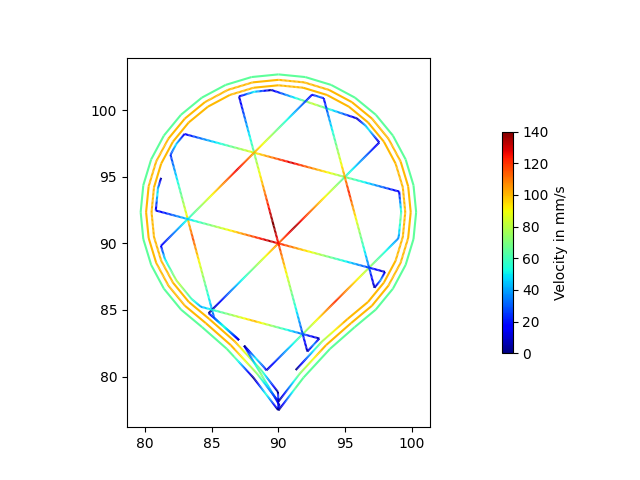

In [5]:
obj = normal.plot_2d_position(colvar="Velocity",colvar_spatial_resolution=0.1,scaled=True,show=True,filename="simulated.png")


In [9]:
obj.x_label("TEST")

AttributeError: 'Figure' object has no attribute 'x_label'

[##########] 100% of 2D Plot Lines Done...
2D Plot saved as  ideal.png


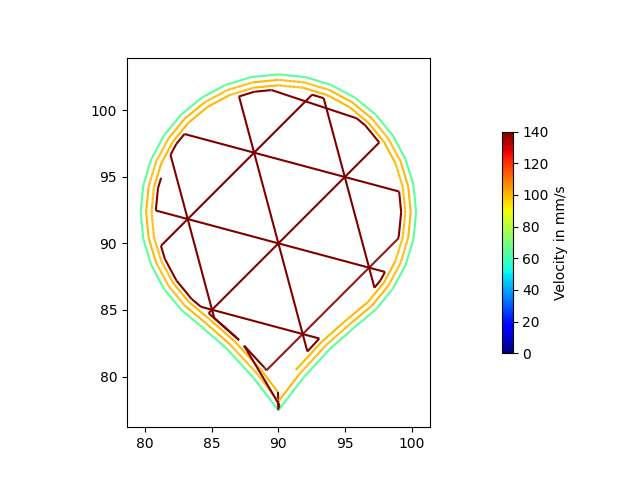

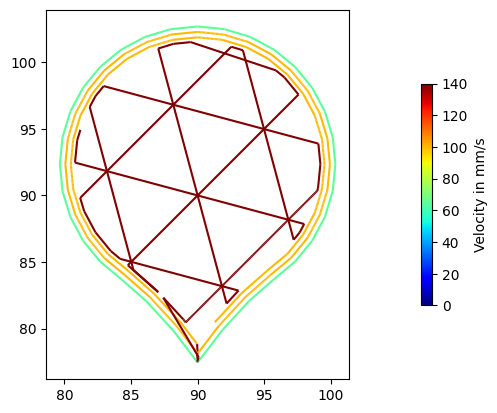

In [4]:
schnell.plot_2d_position(colvar="Velocity",colvar_spatial_resolution=0.1,scaled=True,show=True,filename="ideal.png")